## For this project we will visualize time series data using a line chart, bar chart, and box plots. 

We will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

The presente dataset used in this exercise was provided by freecodecamp in projects section 'data analysis with python certification' 

## Tasks
-Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

-Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

-Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

-Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

-Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [1]:
#Importing the necessaries libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Importing data  and Make sure to parse dates. Consider setting index column to 'date'.

In [139]:
df = pd.read_csv(r"C:\Users\mclar\Downloads\Time_Series_Visualizer(Free_Codecamp).csv",parse_dates = ["date"], index_col = "date")
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [85]:
df.isnull().sum()

value    0
dtype: int64

In [23]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [86]:
# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

In [ ]:
# Drawing the line plot

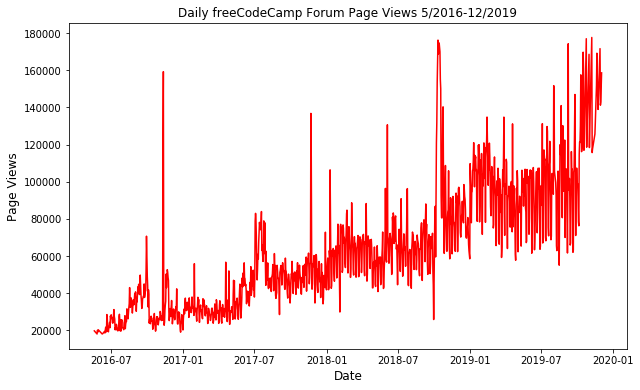

In [89]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(df.index, df["value"], color = "red", linewidth = 1.5)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date", fontsize =12)
ax.set_ylabel("Page Views", fontsize = 12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
fig.savefig('line_plot.png')

### draw_bar_plot()

In [95]:
#Copy and modify data for monthly bar plot
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()
df_bar

C:\Users\mclar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mclar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


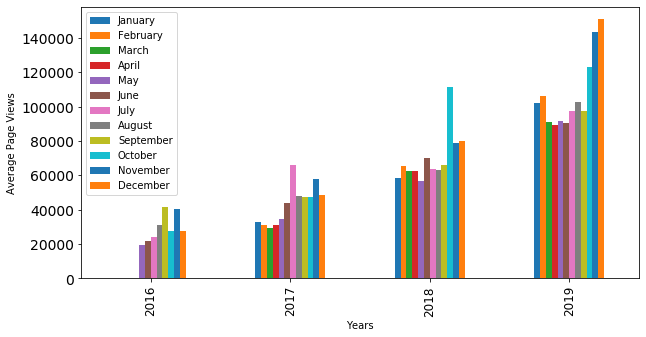

In [102]:
fig = df_bar.plot(kind ="bar", legend = True, figsize = (10,5)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
#plt.xticks(rotation=90)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 10, labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.savefig('bar_plot.png')

### Drawing box_plot

In [130]:
# Preparing the data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-09,1201,2016,May
1,2016-05-10,2329,2016,May
2,2016-05-11,1716,2016,May
3,2016-05-12,10539,2016,May
4,2016-05-13,6933,2016,May
...,...,...,...,...
1299,2019-11-29,171584,2019,Nov
1300,2019-11-30,141161,2019,Nov
1301,2019-12-01,142918,2019,Dec
1302,2019-12-02,220144,2019,Dec


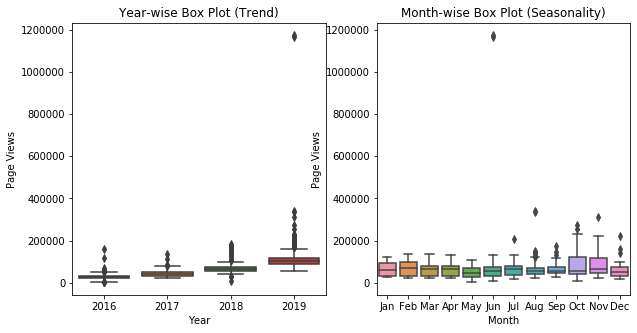

In [170]:
#Draw box plots (using Seaborn)
df_box["month_num"] = df_box.date.dt.month
df_box = df_box.sort_values("month_num")
df_box    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))


axes[0] = sns.boxplot(x=df_box["year"], y=df_box["value"], ax = axes[0])
axes[1] = sns.boxplot(x=df_box["month"], y=df_box["value"], ax = axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
fig.savefig('box_plot.png')